In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import itertools as it

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AR

from sklearn.model_selection import TimeSeriesSplit
from sklearn import metrics
from statsmodels.tsa.api import Holt

import math

import summarize
import acquire
import prepare
import model

In [2]:
df = pd.read_csv('fitbit/tidy.csv')

In [3]:
df = prepare.prepare_data(df)

In [4]:
df.dtypes

calories_burned             int64
steps                       int64
distance                  float64
floors                      int64
minutes_sedentary           int64
minutes_lightly_active      int64
minutes_fairly_active       int64
minutes_very_active         int64
activity_calories           int64
total_minutes_logged        int64
distance_per_step         float64
dtype: object

In [5]:
train, test = model.split_store_data(df, train_prop=.70)

print('Observations: %d' % (len(df)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 225
Training Observations: 157
Testing Observations: 68


In [6]:
target_vars=['steps']
df = df.resample('D')[target_vars].sum()

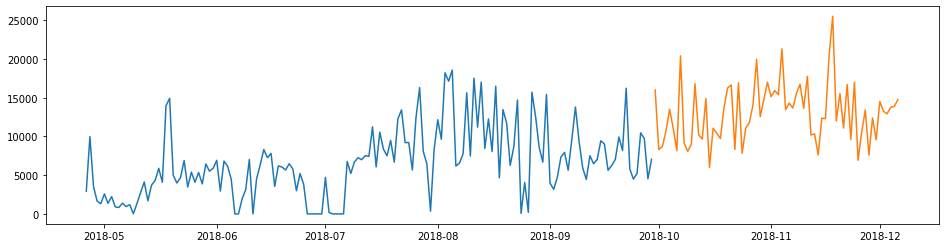

In [7]:
for var in range(len(target_vars)):
    plt.figure(figsize=(16, 4))
    plt.plot(train[target_vars[var]])
    plt.plot(test[target_vars[var]])
    plt.show()

In [8]:
yhat = pd.DataFrame(test[target_vars])

Last Observed

In [9]:
for var in target_vars:
    yhat[var] = int(train[var][-1:])

steps -- MSE: 0.00 RMSE: 0.00


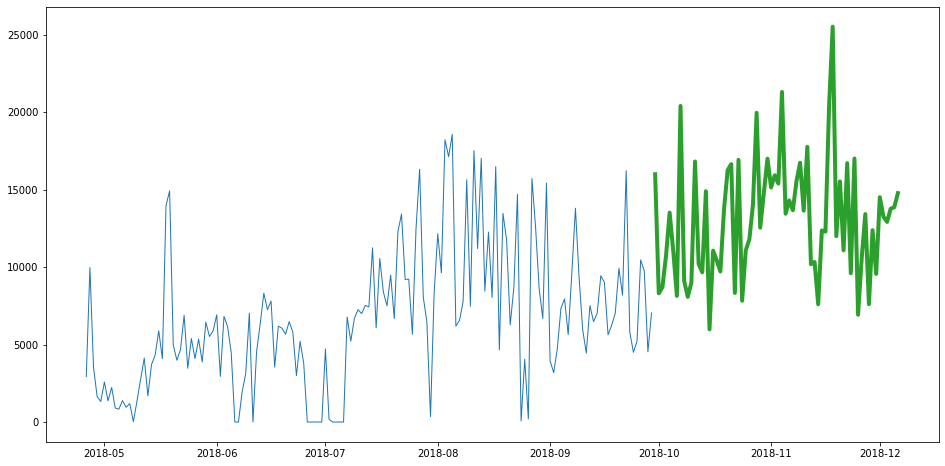

In [10]:
model.plot_and_eval(target_vars=target_vars, train = train, test = test)

Simple Average

In [11]:
for var in target_vars:
    yhat[var] = train[var].mean()

steps -- MSE: 0.00 RMSE: 0.00


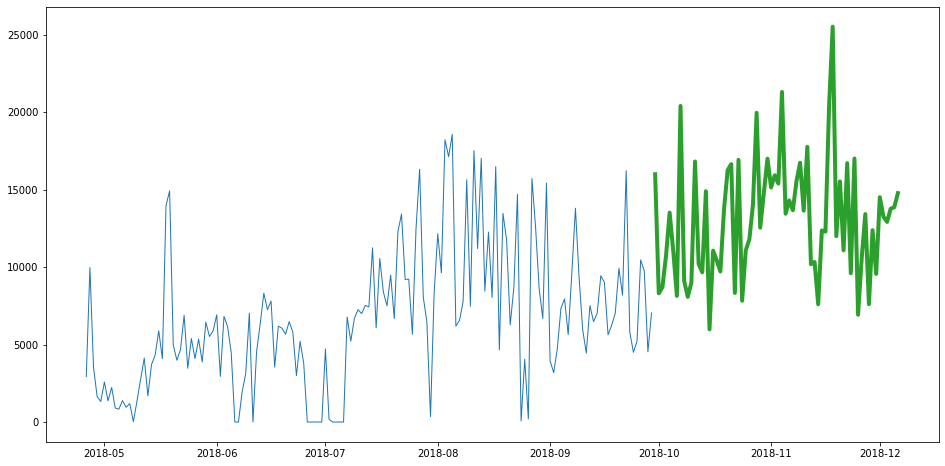

In [12]:
model.plot_and_eval(target_vars=target_vars, train = train, test = test)

Moving Average

In [13]:
periods = 14
for var in target_vars:
    yhat[var] = train[var].rolling(periods).mean().iloc[-1]

steps -- MSE: 0.00 RMSE: 0.00


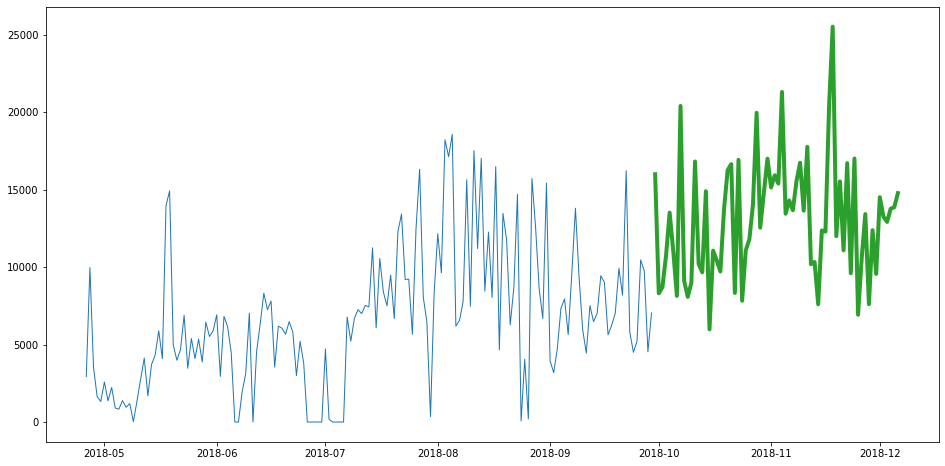

In [14]:
model.plot_and_eval(target_vars=target_vars, train = train, test = test)

Holt's Linear Trend

steps -- MSE: 0.00 RMSE: 0.00


/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


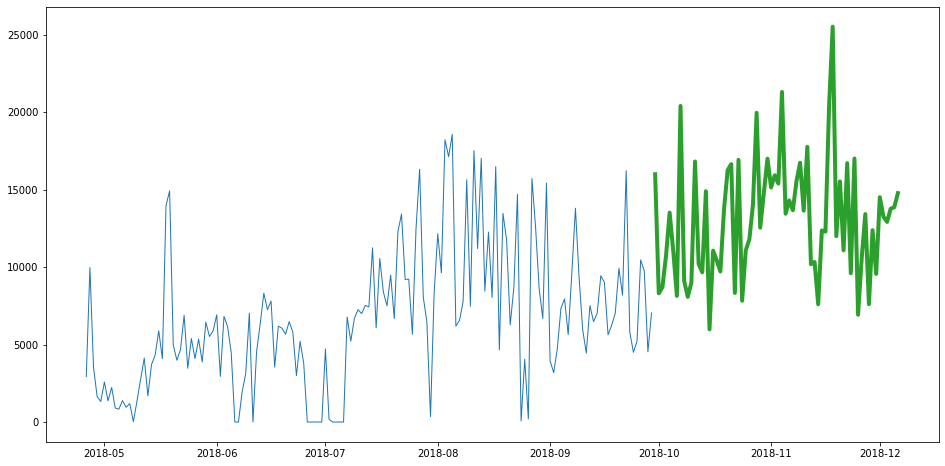

In [15]:
for var in target_vars:
    holt = Holt(train[var]).fit(smoothing_level=.3, smoothing_slope=.1, optimized=False)
    yhat[var] = pd.DataFrame(holt.forecast(test[var].shape[0]), columns=[var])

model.plot_and_eval(target_vars, train, test)
eval_df = model.append_eval_df(model_type='holts_linear_trend', target_vars=target_vars, train = train, test = test)

# Prophet Model

In [16]:
"""import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet
%matplotlib inline
pd.plotting.register_matplotlib_converters()
import warnings
warnings.filterwarnings("ignore")
from acquire import get_store_data
from prepare import prep_store_data_prophet, split_store_data
from summarize import df_summary"""

'import pandas as pd\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nfrom fbprophet import Prophet\n%matplotlib inline\npd.plotting.register_matplotlib_converters()\nimport warnings\nwarnings.filterwarnings("ignore")\nfrom acquire import get_store_data\nfrom prepare import prep_store_data_prophet, split_store_data\nfrom summarize import df_summary'